# Test scripts on command line
Use this notebook as a test space

In [5]:
from platform import python_version
python_version()
import sys
sys.path.append('/projects/icesat2_boreal/lib')
sys.path.append('/projects/Developer/icesat2_boreal/lib')
import ExtractUtils
from pyproj import CRS, Transformer
!pip install pystac_client

  Using cached pystac_client-0.3.2-py3-none-any.whl (19 kB)
  Using cached pystac-1.2.0-py3-none-any.whl (132 kB)
  Attempting uninstall: pystac
    Found existing installation: pystac 1.4.0
    Uninstalling pystac-1.4.0:
      Successfully uninstalled pystac-1.4.0


In [70]:
!python /projects/icesat2_boreal/lib/build_tindex_master.py -t ATL08_filt -y 2022 -m run_LC_height_thresholds -o /projects/my-private-bucket/

/projects/.local/lib/python3.7/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string

Building a list of tiles:  ATL08

Output dir:  /projects/my-public-bucket/DPS_tile_lists
# of duplicate tiles: 46584
Final # of tiles: 46166
df shape :                                              s3_path  ... tile_num
0  s3://maap-ops-workspace/lduncanson/dps_output/...  ...       NA
1  s3://maap-ops-workspace/lduncanson/dps_output/...  ...       NA
2  s3://maap-ops-workspace/lduncanson/dps_output/...  ...       NA
3  s3://maap-ops-workspace/lduncanson/dps_output/...  ...       NA
4  s3://maap-ops-workspace/lduncanson/dps_output/...  ...       NA

[5 rows x 4 columns]
Writing tindex master csv: /projects/my-public-bucket/DPS_tile_lists/ATL08_tindex_master.csv


<AxesSubplot:>

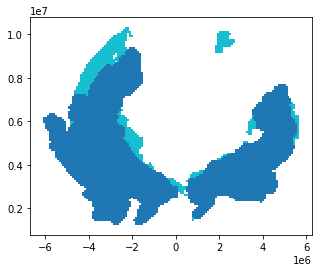

In [2]:
import geopandas

dem_tiles_index_path = '/projects/shared-buckets/nathanmthomas/dem30m_tiles.geojson'
dem_tiles_index = geopandas.read_file(dem_tiles_index_path)
dem_tiles_index['tile_num'] = dem_tiles_index.index

boreal_tile_index_path = '/projects/shared-buckets/nathanmthomas/boreal_tiles_v003.gpkg'
boreal_tile_index = geopandas.read_file(boreal_tile_index_path)
boreal_tile_index.plot(column='tile_version')

#boreal_tile_index[boreal_tile_index.tile_version=='version 2']

In [3]:
dem_tiles_index.tile_num.to_list().sort()

In [6]:
import sys
sys.path.append('/projects/icesat2_boreal/lib')
import maplib_folium

In [7]:
TILE_NUM = 12967
INDEX_FN = '/projects/shared-buckets/lduncanson/dem30m_tiles_v2.geojson'#
INDEX_LYR = 'dem30m_tiles_v2'

TILE_NUM = 3421
INDEX_FN = '/projects/shared-buckets/nathanmthomas/boreal_tiles_v003.gpkg'
INDEX_LYR = 'boreal_tiles_v003'

In [ ]:
args = f"--in_tile_fn {INDEX_FN} \
--in_tile_num {TILE_NUM} \
--tile_buffer_m 120 \
--in_tile_layer {INDEX_LYR} \
-o /projects/test_data/ \
--topo_tile_fn /projects/shared-buckets/nathanmthomas/dem30m_tiles.geojson"
print(args)
!python /projects/icesat2_boreal/lib/3.1.5_dps.py $args

In [ ]:
args = f"-i {INDEX_FN} \
--in_tile_num {TILE_NUM} \
-lyr {INDEX_LYR} \
-o /projects/test_data \
-a https://cmr.earthdata.nasa.gov/stac/LPCLOUD \
--tile_buffer_m 0 \
-sy 2020 -ey 2021 -smd 06-01 -emd 06-15 -mc 40 -t HLS"
print(args)
!python 3.1.2_dps.py $args

In [8]:
%%time
args = f"\
-LC_filter True \
--extract_covars \
--do_30m \
--do_dps \
-years_list 2019 2020 2021 \
-o /projects/my-public-bucket/atl08_filt_covar_tiles \
-in_tile_num {TILE_NUM} \
-in_tile_fn {INDEX_FN} \
-in_tile_layer {INDEX_LYR} \
-in_tile_id_col tile_num \
-csv_list_fn /projects/shared-buckets/lduncanson/DPS_tile_lists/ATL08_tindex_master.csv \
-topo_stack_list_fn /projects/shared-buckets/nathanmthomas/DPS_tile_lists/Topo_tindex_master.csv \
-landsat_stack_list_fn /projects/shared-buckets/nathanmthomas/DPS_tile_lists/HLS_tindex_master.csv \
-landsat_cols_list Blue Green Red NIR SWIR SWIR2 NDVI SAVI MSAVI NDMI EVI NBR NBR2 TCB TCG TCW ValidMask Xgeo Ygeo JulianDate yearDate \
-user_stacks nathanmthomas \
-user_atl08 lduncanson \
-thresh_sol_el 5 \
-v_ATL08 5 -minmonth 4 -maxmonth 10"
print(args)
!python /projects/icesat2_boreal/lib/tile_atl08.py $args

-LC_filter True --extract_covars --do_30m --do_dps -years_list 2019 2020 2021 -o /projects/my-public-bucket/atl08_filt_covar_tiles -in_tile_num 3421 -in_tile_fn /projects/shared-buckets/nathanmthomas/boreal_tiles_v003.gpkg -in_tile_layer boreal_tiles_v003 -in_tile_id_col tile_num -csv_list_fn /projects/shared-buckets/lduncanson/DPS_tile_lists/ATL08_tindex_master.csv -topo_stack_list_fn /projects/shared-buckets/nathanmthomas/DPS_tile_lists/Topo_tindex_master.csv -landsat_stack_list_fn /projects/shared-buckets/nathanmthomas/DPS_tile_lists/HLS_tindex_master.csv -landsat_cols_list Blue Green Red NIR SWIR SWIR2 NDVI SAVI MSAVI NDMI EVI NBR NBR2 TCB TCG TCW ValidMask Xgeo Ygeo JulianDate yearDate -user_stacks nathanmthomas -user_atl08 lduncanson -thresh_sol_el 5 -v_ATL08 5 -minmonth 4 -maxmonth 10
/projects/.local/lib/python3.7/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9